# Load Location Data Repositories

This notebook demonstrates how *OptiWindNet* can load all `osm.pbf` and `.yaml` files from a directory into a *namedtuple* of *networkx* graphs, which can be used to initialize a `WindFarmNetwork()` instance.

## Import required modules

To use this functionality we need `load_repository()` as well as `WindFarmNetwork`.

In [1]:
import pprint

In [2]:
from optiwindnet.api import WindFarmNetwork, load_repository

In [3]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

## Load a repository

`load_repository()` (without arguments) reads the `.osm.pbf` and `.yaml` locations distributed with *OptiWindNet*. The function returns a *namedtuple* of *networkx* graphs containing location data.

>Note: `load_repository('path/to/custom/repo')` loads instead all `.osm.pbf` and `.yaml` files from the custom repository in that directory.

In [4]:
locations = load_repository()

In [5]:
pprint.pp(sorted(locations._fields), compact=True)
print(f'Location count: {len(locations)}')

['albatros', 'amalia', 'amrumbank', 'anglia', 'anholt', 'arkona', 'baltic2',
 'bard', 'beatrice', 'belwind', 'binhainorthH2', 'bodhi', 'borkum', 'borkum2',
 'borkum3', 'borssele', 'brieuc', 'bucht', 'butendiek', 'cazzaro_2022',
 'cazzaro_2022G140', 'cazzaro_2022G210', 'changhua1', 'coastalva', 'dantysk',
 'doggerA', 'doggerB', 'doggerC', 'dudgeon', 'eagle', 'fecamp', 'gabbin',
 'galloper', 'gangkou1', 'gangkou2', 'gemini1', 'gemini2', 'glotech1', 'gode',
 'gwynt', 'hedreiht', 'hohesee', 'horns', 'horns2', 'horns3', 'hornsea',
 'hornsea2w', 'humber', 'inchcape', 'jiaxing1', 'kaskasi', 'kfA', 'kfB',
 'kustzuid', 'lillgrund', 'lincs', 'london', 'luchterduinen', 'meerwind',
 'merkur', 'mermaid', 'morayeast', 'moraywest', 'nanpeng', 'nazaire', 'neart',
 'noirmoutier', 'nordsee', 'nordseeost', 'norther', 'northwind', 'nysted',
 'ormonde', 'race', 'rampion', 'rental', 'riffgat', 'robin', 'rough',
 'rudongH10', 'rudongH6', 'rudongH8', 'rudongdemo', 'rødsand2', 'sandbank',
 'sands', 'seagreen',

Each location is loaded as a *networkx* graph containing location data.

In [6]:
type(locations.seagreen)

networkx.classes.graph.Graph

## Use loaded locations

Initialize an instance of `WindFarmNetwork` with one of the locations (e.g. seagreen).

In [7]:
wfn = WindFarmNetwork(L=locations.seagreen, cables=[(2, 1500.0), (5, 1800.0)])

### Plot location

> Note: We could use `wfn.plot_location()` for plotting the location. For more details look into the notebook about [plotting](a04_Plotting.ipynb)

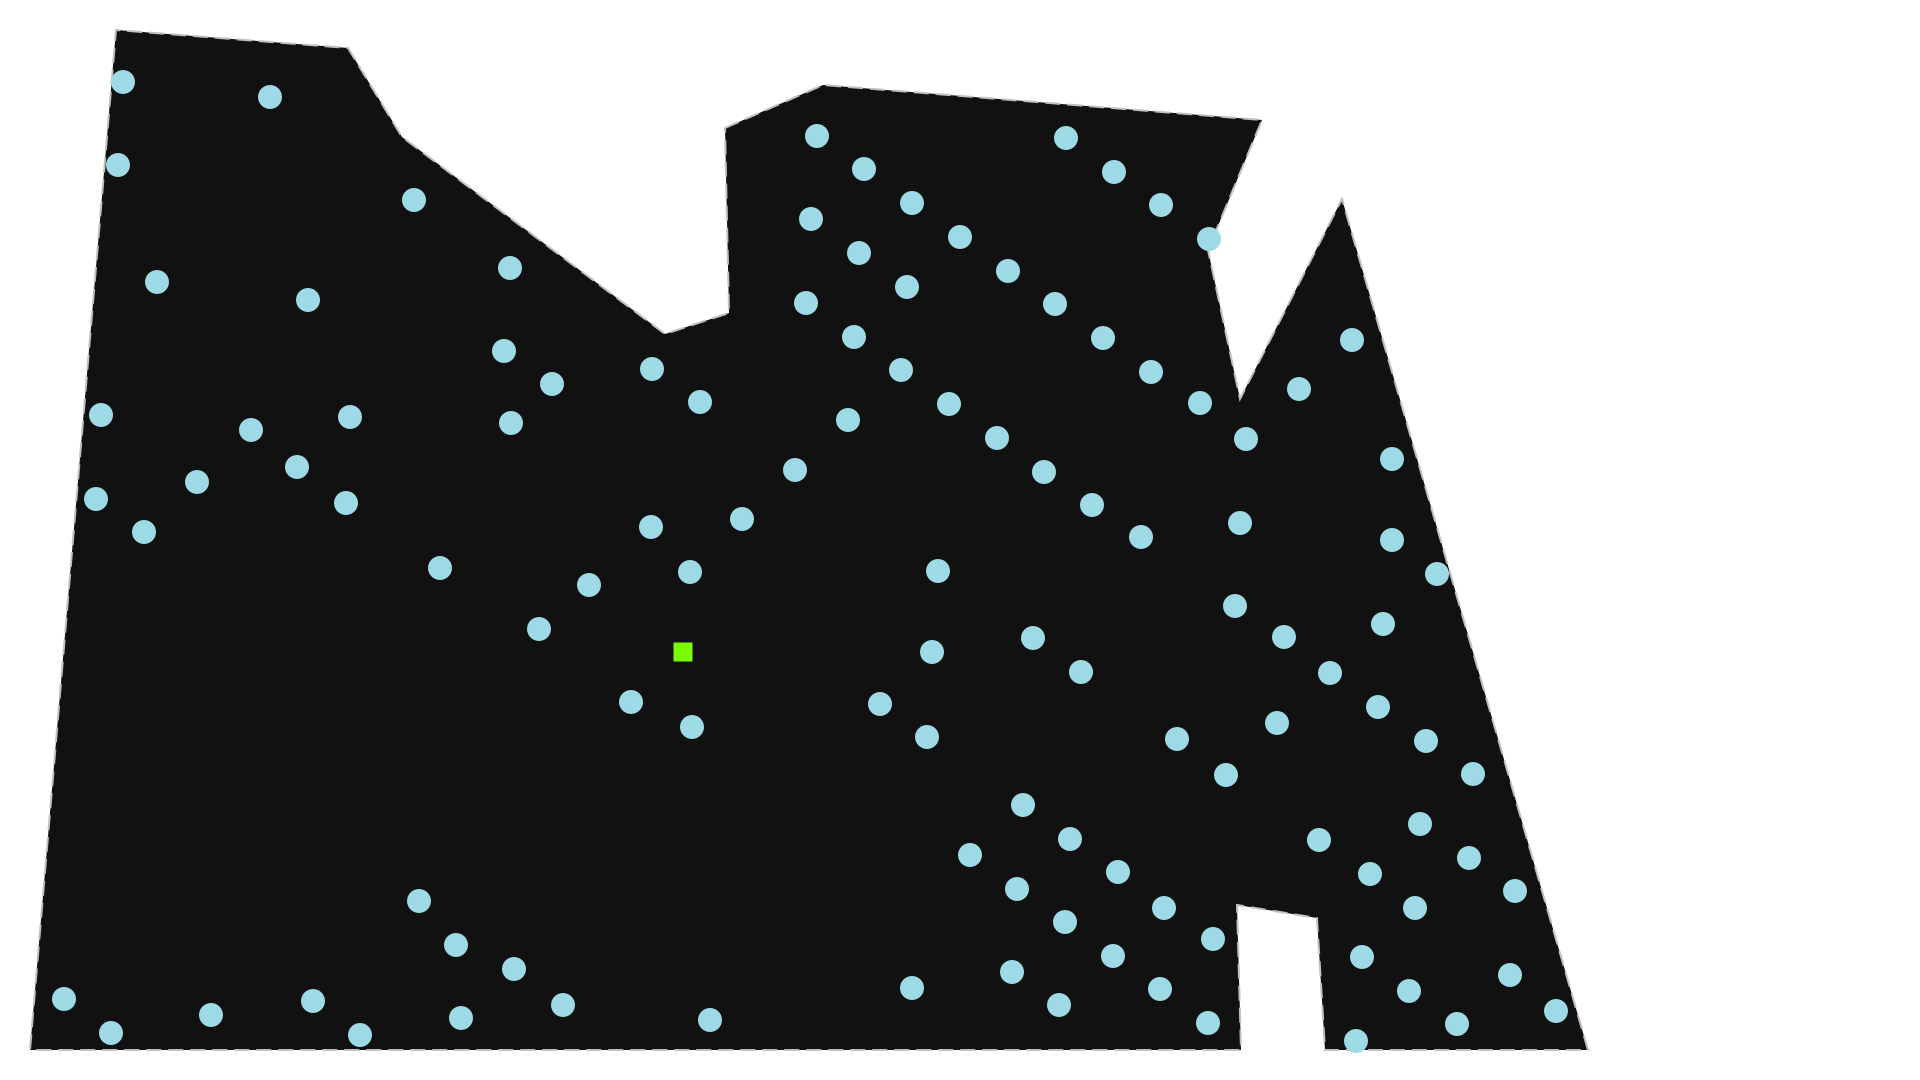

In [8]:
wfn

## List the locations in OptiWindNet's repository

Print (for all available locations):
- `handle`: short identifier
- `name`: long form location name
- `R`: number of Roots (Substations)
- `T`: number of Terminals (Turbines)

In [9]:
for L in sorted(locations, key=lambda loc: loc.graph['name']):
    print(f'{L.graph['name']} ({L.graph['handle']}) : '
          f'R = {L.graph['R']}, T = {L.graph['T']}')

Albatros (albatros) : R = 1, T = 16
Amrumbank West (amrumbank) : R = 1, T = 80
Anholt (anholt) : R = 1, T = 111
Arkona (arkona) : R = 1, T = 60
BARD Offshore 1 (bard) : R = 1, T = 80
Baltic 2 (baltic2) : R = 1, T = 80
Baltic Eagle (eagle) : R = 1, T = 50
Beatrice (beatrice) : R = 2, T = 84
Belwind (belwind) : R = 1, T = 55
Borkum Riffgrund 1 (borkum) : R = 1, T = 78
Borkum Riffgrund 2 (borkum2) : R = 1, T = 52
Borkum Riffgrund 3 (borkum3) : R = 1, T = 83
Borssele (borssele) : R = 2, T = 173
Butendiek (butendiek) : R = 1, T = 80
CECEP Yangjiang Nanpeng Island (nanpeng) : R = 1, T = 55
CGN Rudong Demonstration (rudongdemo) : R = 1, T = 38
Cazzaro-2022 (cazzaro_2022) : R = 1, T = 50
Cazzaro-2022G-140 (cazzaro_2022G140) : R = 3, T = 140
Cazzaro-2022G-210 (cazzaro_2022G210) : R = 3, T = 210
Coastal Virginia (coastalva) : R = 3, T = 176
DanTysk (dantysk) : R = 1, T = 80
Deutsche Bucht (bucht) : R = 1, T = 31
Dogger Bank A (doggerA) : R = 1, T = 95
Dogger Bank B (doggerB) : R = 1, T = 95
Dogg

Any of the locations in this list can be directly passed to `WindFarmNetwork` instance as `L` graph, e.g.:
```python
    wfn = WindFarmNetwork(L=locations.seagreen, cables=7)
```